# Лабораторная работа№2

Балаева Милана , 9382

**Цель работы:** практическое применение дискретного преобразования Фурье c
использованием библиотек Python для анализа речевых сигналов.

**Данные для работы:**
1. Средствами ОС Windows записать свой речевой сигнал.
2. Фраза — *Добрый день, я учусь в университете ЛЭТИ, на факультете компьютерных
технологий и информатики.*
3. *Формат записи* — моно-сигнал, 16000 гц или 22000 гц, без сжатия (wav-формат).

**Задачи лабораторной работы:**

1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на
записи своего голоса
3. Построить сонограмму по записи своего голоса.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import more_itertools as mi
from scipy.fftpack import fft, dct
from scipy.io.wavfile import read, write
from scipy import signal
from scipy import hamming

%matplotlib inline

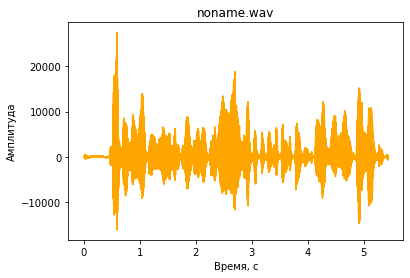

In [94]:
samplerate, data = read('noname.wav')
ipd.Audio('./noname.wav')

length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])

plt.plot(time,data, color="orange")
plt.xlabel("Время, с")
plt.ylabel("Амплитуда")
plt.title('noname.wav')
plt.show()

**1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса:**

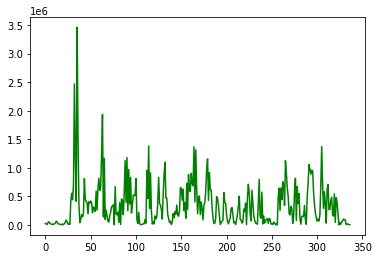

In [95]:
N = 1024
overlap = 0.25
csr = round(samplerate/ N)
k_limit = 2


order = list(mi.windowed(data, n=N, step=int(overlap*N)))
order[-1] = list(i for i in order[-1] if i)

for i, item in enumerate(order):
    order[i] = item * np.hamming(len(item))

for i, item in enumerate(order):
    order[i] = fft(item)
    
spector = []
for i, item in enumerate(order):
    spector.append(sum([k**2 for k in item[:int(len(item)/2)]])**0.5)

spector = np.array([i.real for i in spector])

plt.plot(spector, color="green")
plt.show()

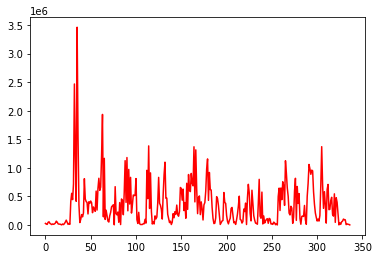

In [96]:
F0 = []

for i in [spector[k:k + csr] for k in range(len(spector))[::csr]]:
    limit = i.mean() * k_limit
    if i.max() > limit:
        F0 += i.tolist()
    else:
        F0 += np.zeros(len(i)).tolist()

plt.plot(F0, color="red")
plt.show()

**2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса:**

1форманта:


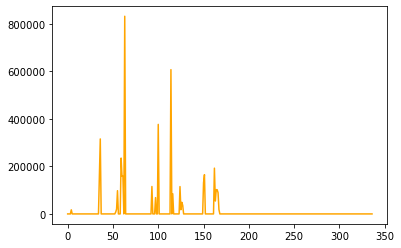

2форманта:


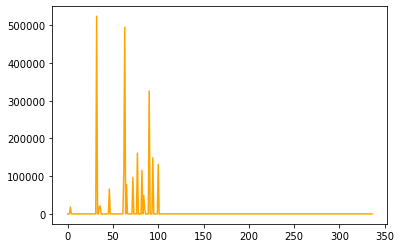

3форманта:


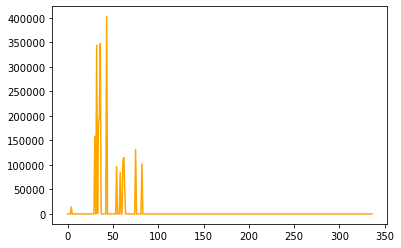

In [97]:
for l in range(3):

    F.append([])
    F[l] = []
    for i in range(0,len(F0)):
        if ((l+2) * i - 1 < 0 or (l+2) * i + 1 >= len(F0)):
            F[l] += [0]
            continue
        limit = max(F0[(l+2)*i - 1], F0[(l+2)*i], F0[(l+2)*i + 1])
        if F0[i] > k_limit * limit:
            F[l] += [limit]
        else:
            F[l] += [0]
    print(str(l+1)+"форманта:")
    plt.plot(F[l], color="orange")
    plt.show()

**3. Построить сонограмму по записи своего голоса:**

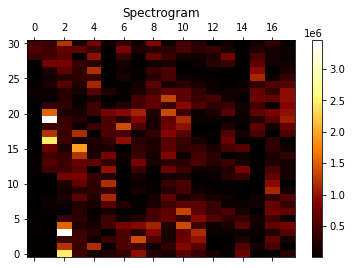

In [98]:
amp = []
for i in [spector[k:k + Sr] for k in range(len(spector) - 56)[::csr]]:
    amp.append(i)

fig, ax = plt.subplots(nrows=1, ncols=1)
cax = ax.matshow(
    np.transpose(amp),
    interpolation="nearest",
    aspect="auto",
    cmap=plt.cm.afmhot,
    origin="lower",
)
fig.colorbar(cax)
plt.title("Spectrogram")
plt.show()

**Вывод:**

В ходе выполнения лабораторной работы были применены на практике библиотеки языка Python: matplotlib, numpy, scipy, с помощью которых обрабатывались звуковые сигналы, дискретное преобразование Фурье для анализа речевых сигналов.